# Regression with a Crab Age dataset

"The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset."

The **aim** is to predict the **age**.

**Features and Label**:

Sex: Gender of the Crab - Male, Female and Indeterminate
<br>Length: Length of the Crab in feet
<br>Diameter: Diameter of the Crab in feet
<br>Height: Height of the Crab in feet
<br>Weight: Weight of the Crab in ounces
<br>Shucked Weight: Weight without the shell in ounces
<br>Viscera Weight: Weight that wraps around the crab's abdominal organs in ounces
<br>Shell Weight: Weight of the Shell in ounces
<br>Age: Age of the Crab in months

**Sources**:

- [Kaggle challenge](https://www.kaggle.com/competitions/playground-series-s3e16/data?select=test.csv)
- [Original Dataset](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)

# Outline
- [ 1 - Read Data ](#1) 
- [ 2 - EDA - Exploratory Data Analysis](#2)
- [ 3 - Preprocessing Data Before Modeling](#3)
- [ 4 - Model Training](#4)
- [ 5 - Model Comparison](#5)
- [ 6 - Model Tuning](#6)
- [ 7 - Model Diagnostic](#7)
- [ 8 - Challenge Submission](#8)

In [2]:
# importing standard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit

from xgboost import XGBRegressor

In [63]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'axes.titlesize': 16,
    'figure.figsize': (12, 4),
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('colorblind'), 
              rc=theme_parameters)

<a name="1"></a>
# Read Data

In [4]:
read_from_kaggle = False

In [5]:
if read_from_kaggle:
    
    data = pd.read_csv('',
                       index_col=0)
    orig_data = pd.read_csv('',
                            index_col=0)
    
    
else:

    train_data = pd.read_csv("./../data/crab_age_train.csv",
                             index_col=0)
    test_data = pd.read_csv("./../data/crab_age_test.csv",
                            index_col=0)
    orig_data = pd.read_csv("./../data/crab_age_original.csv")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [6]:
train_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49368 entries, 74051 to 123418
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


In [8]:
test_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [9]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [10]:
orig_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


## Defining Categorical Dtype

In [6]:
# List of datasets
datasets = [train_data, test_data, orig_data]

# Columns to convert to categorical
columns = ['Sex']

for dataset in datasets:
    for column in columns:
        dataset[column] = dataset[column].astype('category')

<a name="2"></a>
# EDA - Exploratory Data Analysis

## Numeric Feature Distribution Train vs Test vs Original Data KDEs

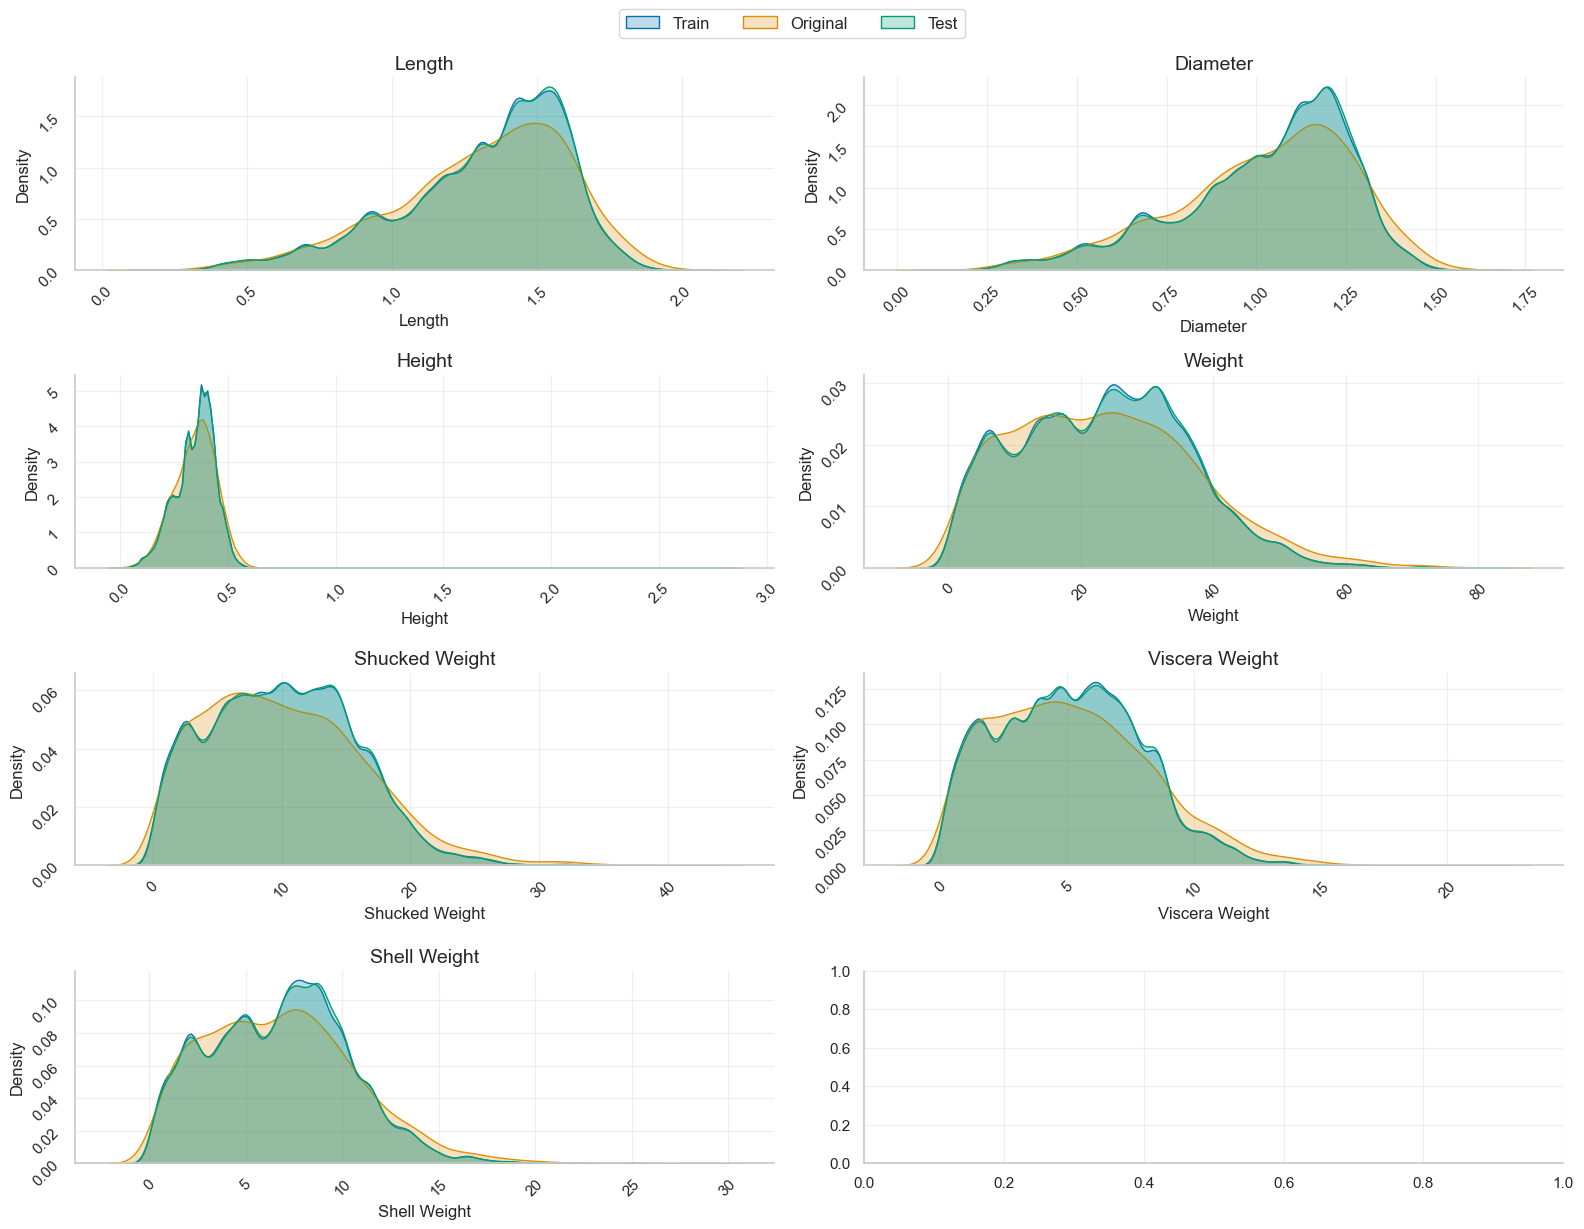

In [12]:
figure, ax = plt.subplots(4, 2, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

for index, col_name in enumerate([col for idx, col in enumerate(train_data.columns) if idx not in exclude_indices]):
    
    sns.kdeplot(data=train_data[col_name],
                label='Train',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=orig_data[col_name],
                label='Original',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=test_data[col_name],
                label='Test',
                fill=True,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

plt.tight_layout()
plt.show()

## Label Distribution Challenge vs Original Data KDEs

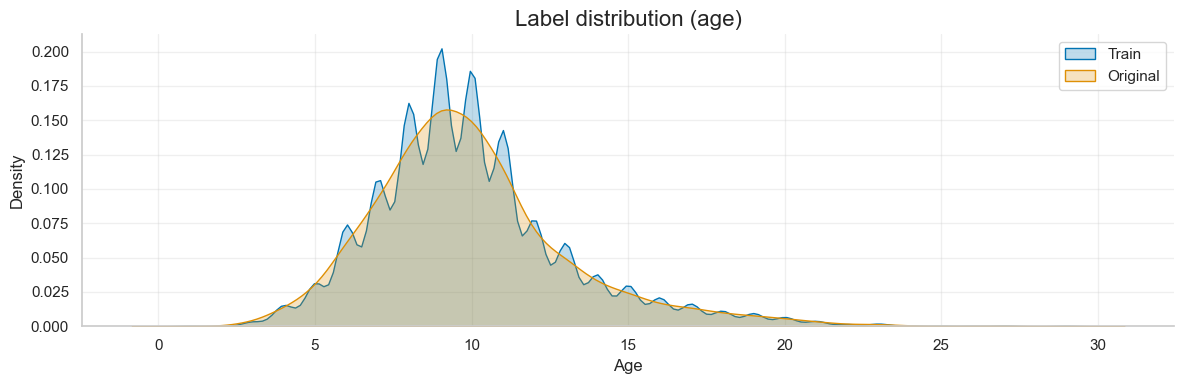

In [13]:
sns.kdeplot(data=train_data['Age'],
            label='Train',
            fill=True)

sns.kdeplot(data=orig_data['Age'],
            label='Original',
            fill=True)

plt.title('Label distribution (age)')

plt.legend()

plt.tight_layout()
plt.show()

## Categorical Features

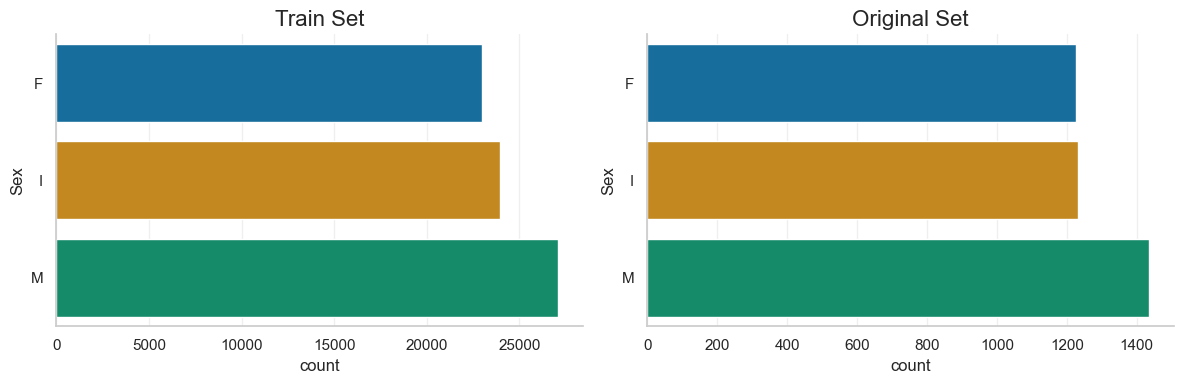

In [14]:
figure, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.flatten()

sns.countplot(data=train_data.sort_values('Sex'), 
              y="Sex",
              ax=ax[0])

sns.countplot(data=orig_data.sort_values('Sex'), 
              y="Sex",
              ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Original Set')

plt.tight_layout()
plt.show()

## Boxplot Numerical Features vs Sex

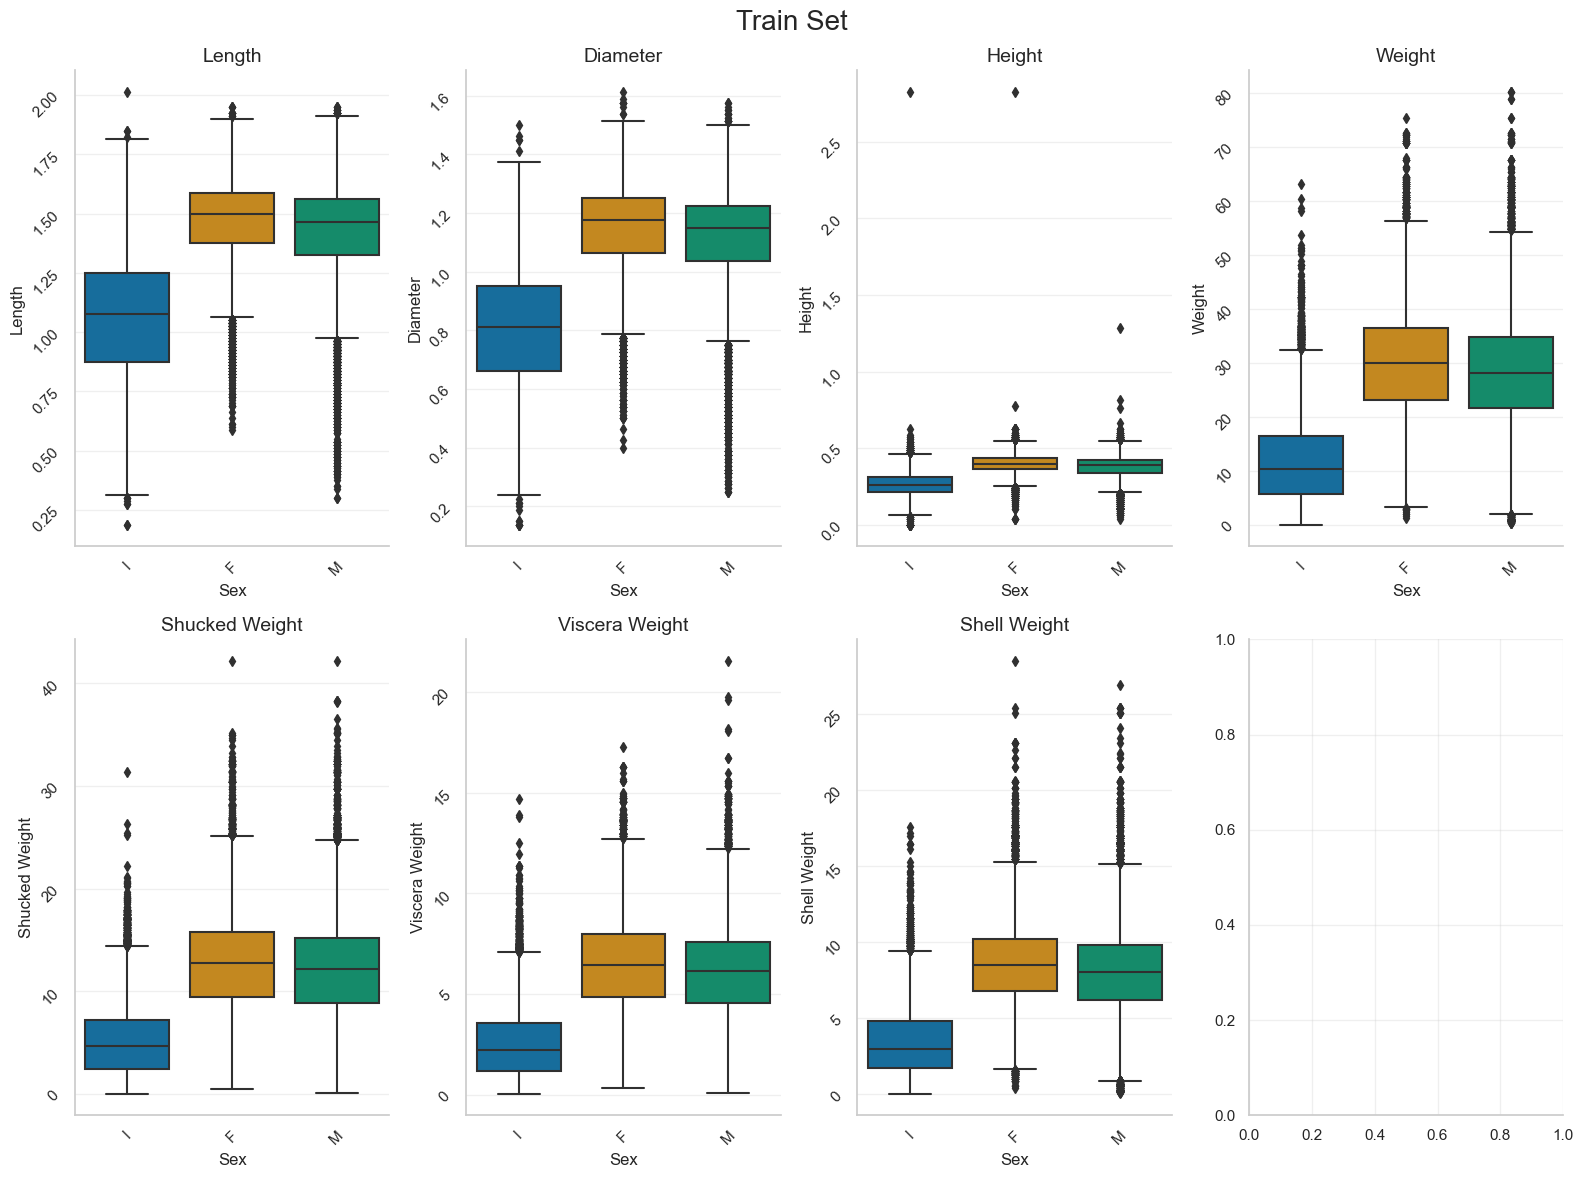

In [15]:
figure, ax = plt.subplots(2, 4, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

# Sex order
sex_order = ['I', 'F', 'M']

for index, col_name in enumerate([col for idx, col in enumerate(orig_data.columns) if idx not in exclude_indices]):
    
    sns.boxplot(data=train_data,
                x='Sex',
                y=col_name,
                order=sex_order,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.suptitle('Train Set', fontsize=20)
    
plt.tight_layout()
plt.show()

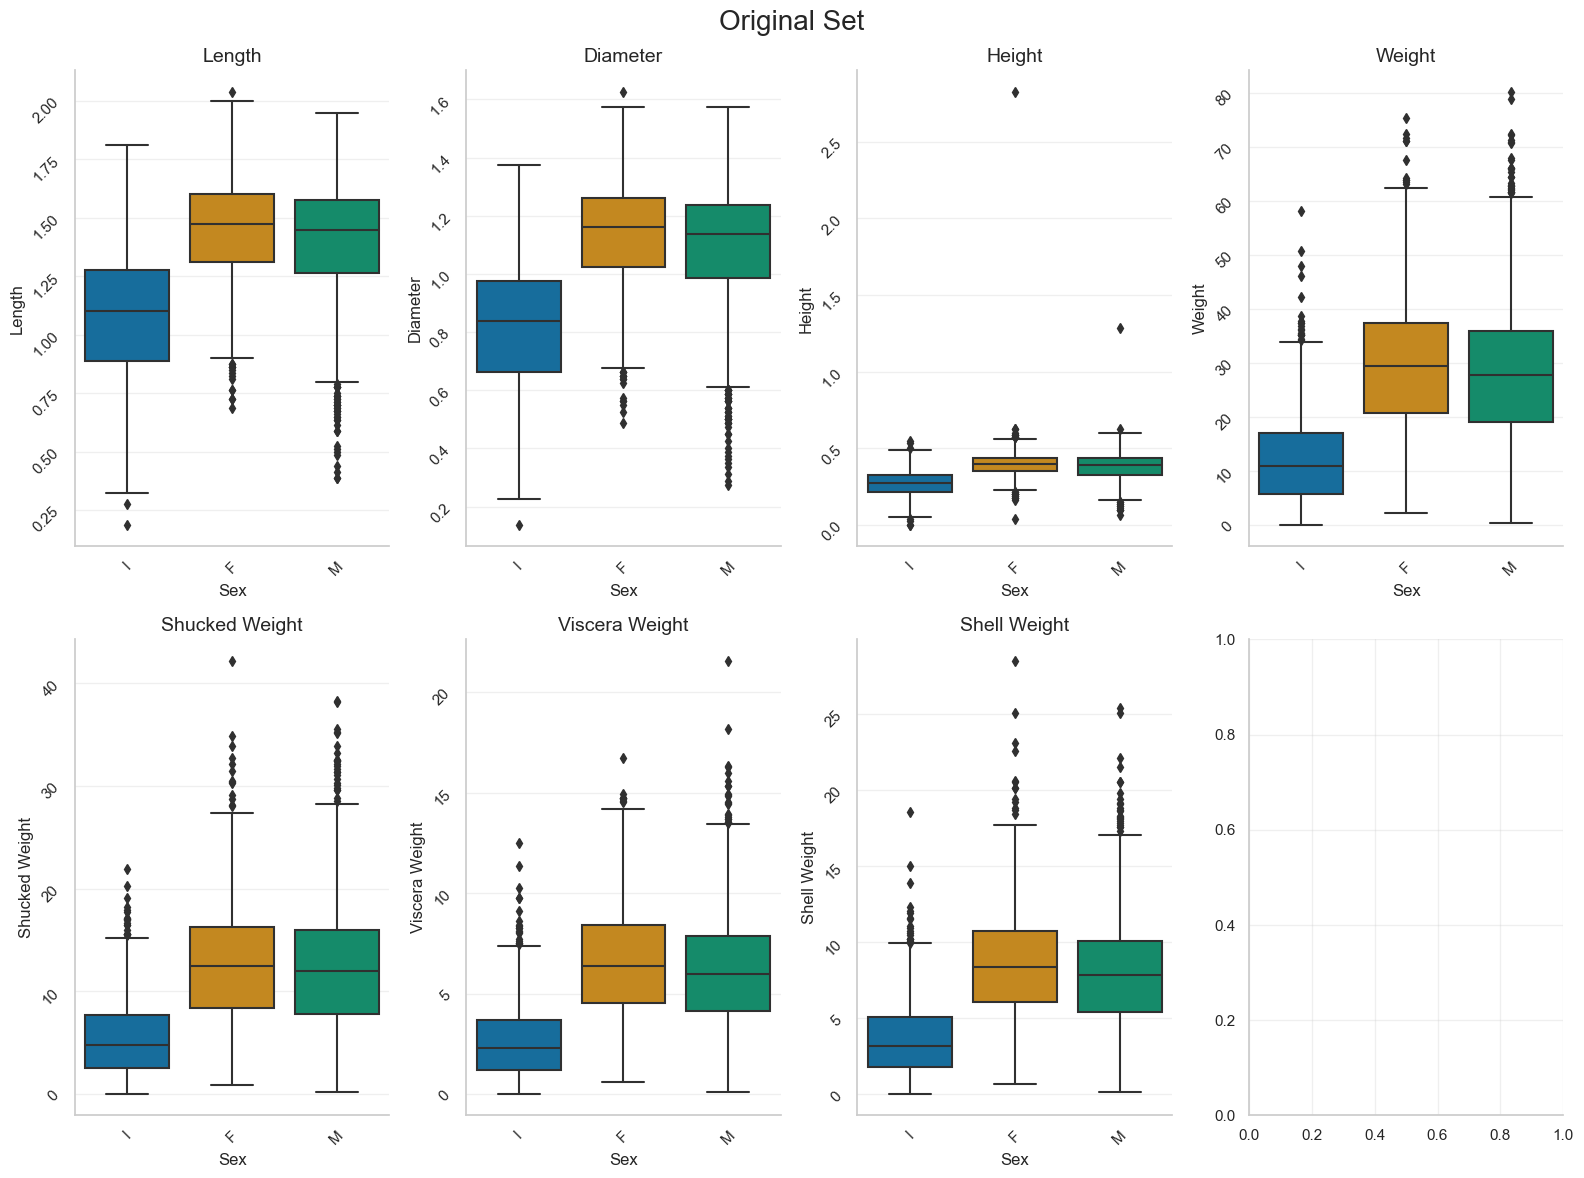

In [16]:
figure, ax = plt.subplots(2, 4, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

# Sex order
sex_order = ['I', 'F', 'M']

for index, col_name in enumerate([col for idx, col in enumerate(orig_data.columns) if idx not in exclude_indices]):
    
    sns.boxplot(data=orig_data,
                x='Sex',
                y=col_name,
                order=sex_order,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.suptitle('Original Set', fontsize=20)
    
plt.tight_layout()
plt.show()

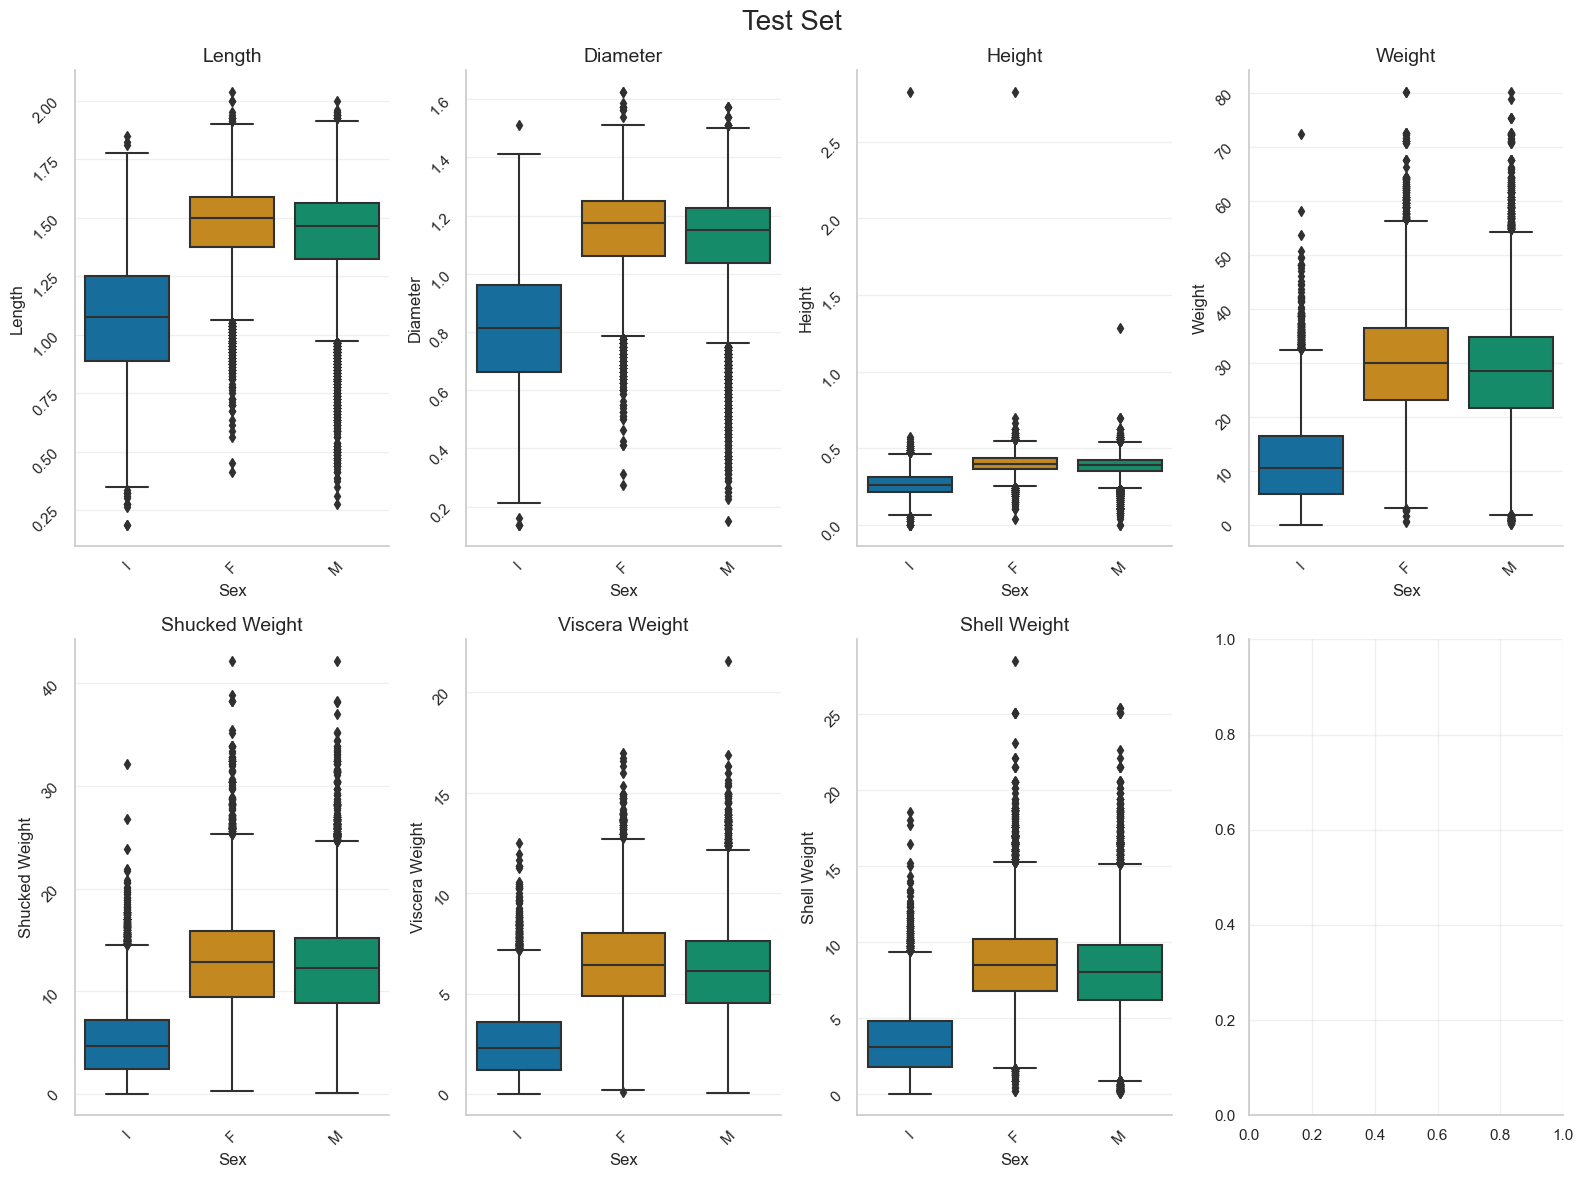

In [17]:
figure, ax = plt.subplots(2, 4, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

# Sex order
sex_order = ['I', 'F', 'M']

for index, col_name in enumerate([col for idx, col in enumerate(orig_data.columns) if idx not in exclude_indices]):
    
    sns.boxplot(data=test_data,
                x='Sex',
                y=col_name,
                order=sex_order,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.suptitle('Test Set', fontsize=20)
    
plt.tight_layout()
plt.show()

## Boxplot Label vs Sex

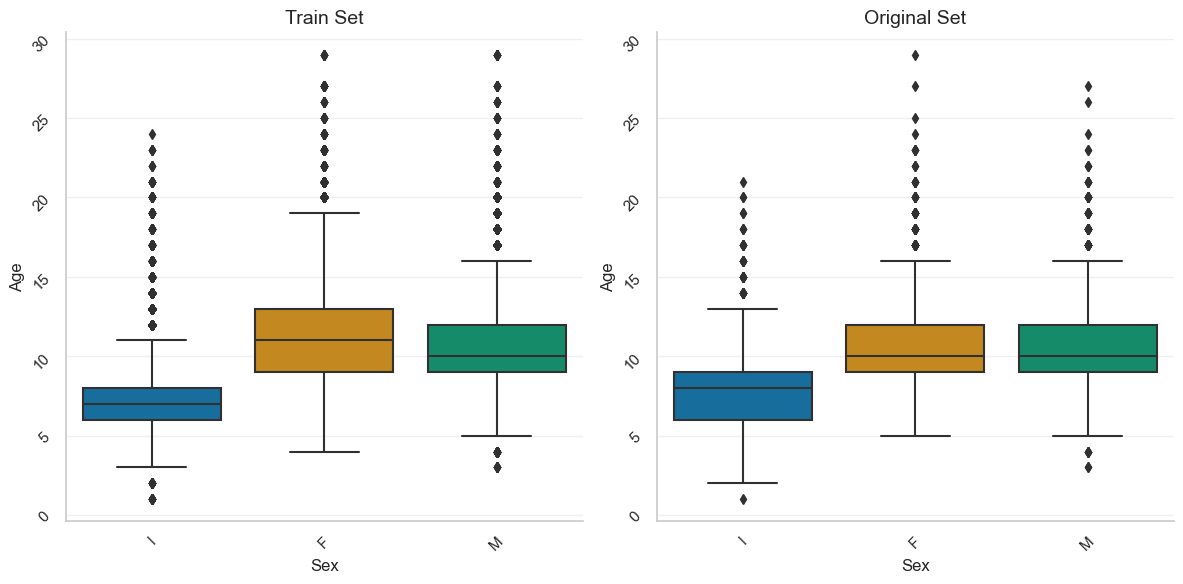

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax.flatten()

data = [train_data, orig_data]
titles = ['Train Set', 'Original Set']

# Sex order
sex_order = ['I', 'F', 'M']

for index, dataset in enumerate(data):
    sns.boxplot(data=dataset,
                x='Sex',
                y='Age',
                order=sex_order,
                ax=ax[index])
    
    ax[index].set_title(str(titles[index]), fontsize=14)
    
    ax[index].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

## Pearson vs Spearman Correlation Matrix

In [19]:
train_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [20]:
# Define columns to use in correlation matrix
corr_columns = ['Length', 
                'Diameter', 
                'Height', 
                'Weight', 
                'Shucked Weight',
                'Viscera Weight', 
                'Shell Weight']

corr_columns_test = ['Length', 
                     'Diameter', 
                     'Height', 
                     'Weight', 
                     'Shucked Weight',
                     'Viscera Weight', 
                     'Shell Weight']

In [21]:
# Generate correlation matrix train set
correlation_train = train_data[corr_columns].corr(method='pearson')

# Generate a mask for the upper triangle
correlation_mask_train = np.triu(np.ones_like(correlation_train, dtype=bool))

# Generate correlation matrix original set
correlation_orig = orig_data[corr_columns].corr(method='pearson')

# Generate a mask for the upper triangle
correlation_mask_orig = np.triu(np.ones_like(correlation_orig, dtype=bool))

# Generate correlation matrix test set
correlation_test = test_data[corr_columns_test].corr(method='pearson')

# Generate a mask for the upper triangle
correlation_mask_test = np.triu(np.ones_like(correlation_test, dtype=bool))

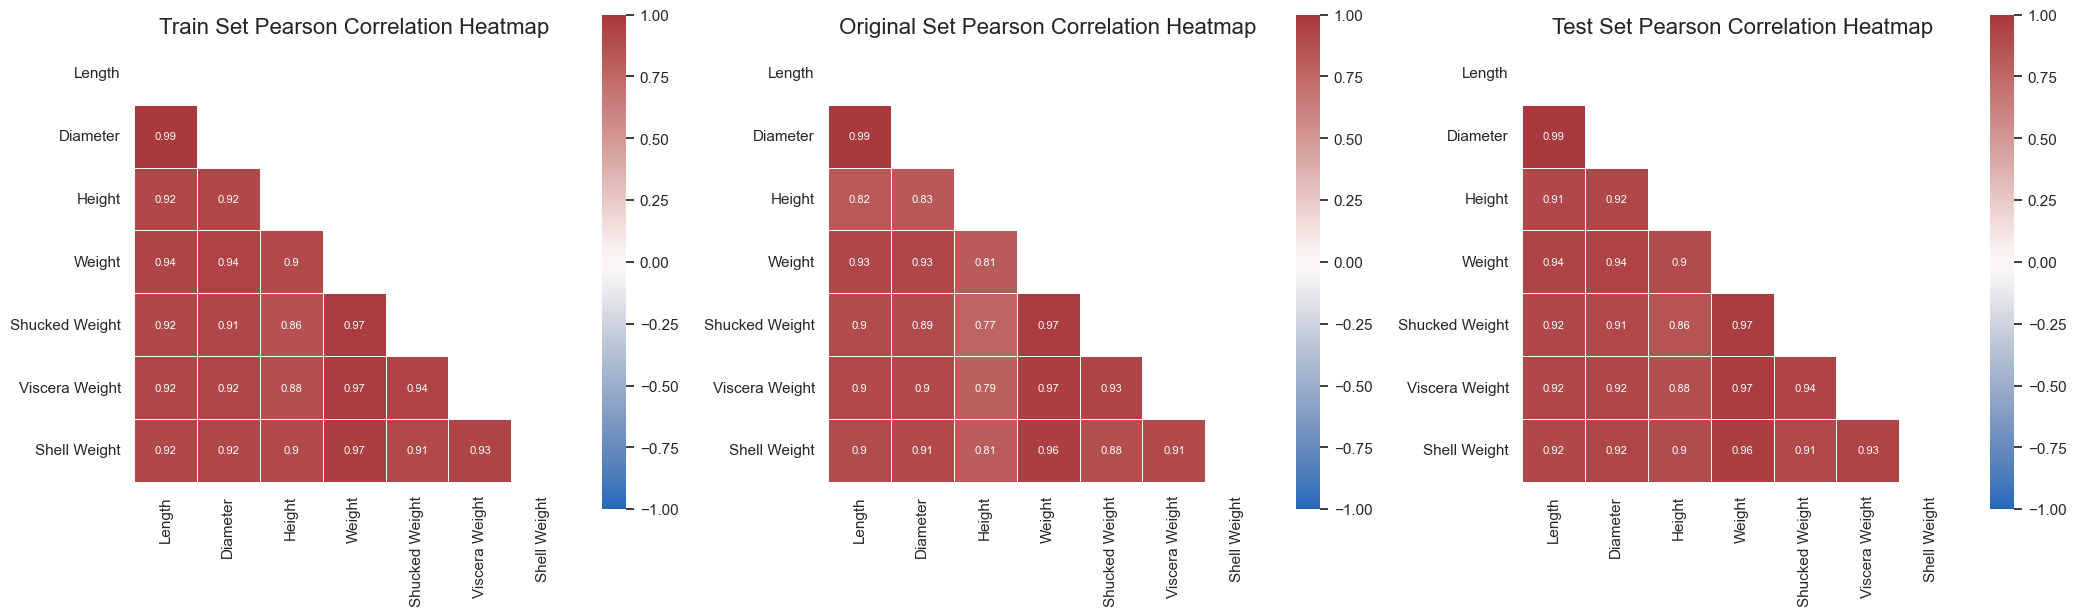

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax = ax.flatten()

# Define lost to iterate on
datasets = [(correlation_train, correlation_mask_train, 'Train Set Pearson Correlation Heatmap'),
            (correlation_orig, correlation_mask_orig, 'Original Set Pearson Correlation Heatmap'),
            (correlation_test, correlation_mask_test, 'Test Set Pearson Correlation Heatmap')]

for i, (correlation_data, correlation_mask, title) in enumerate(datasets):
    sns.heatmap(correlation_data,
                mask=correlation_mask,
                cmap='vlag',
                vmax=1.0,
                vmin=-1.0,
                center=0,
                square=True,
                linewidths=.5,
                annot=True,
                annot_kws={'fontsize': 8},
                cbar_kws={"shrink": .8, 'orientation': 'vertical'},
                ax=ax[i])
    ax[i].set_title(title)
    
plt.tight_layout()
plt.show()

## Spearman Correlation Matrix

In [23]:
# Generate correlation matrix train set
correlation_train = train_data[corr_columns].corr(method='spearman')

# Generate a mask for the upper triangle
correlation_mask_train = np.triu(np.ones_like(correlation_train, dtype=bool))

# Generate correlation matrix original set
correlation_orig = orig_data[corr_columns].corr(method='spearman')

# Generate a mask for the upper triangle
correlation_mask_orig = np.triu(np.ones_like(correlation_orig, dtype=bool))

# Generate correlation matrix test set
correlation_test = test_data[corr_columns_test].corr(method='spearman')

# Generate a mask for the upper triangle
correlation_mask_test = np.triu(np.ones_like(correlation_test, dtype=bool))

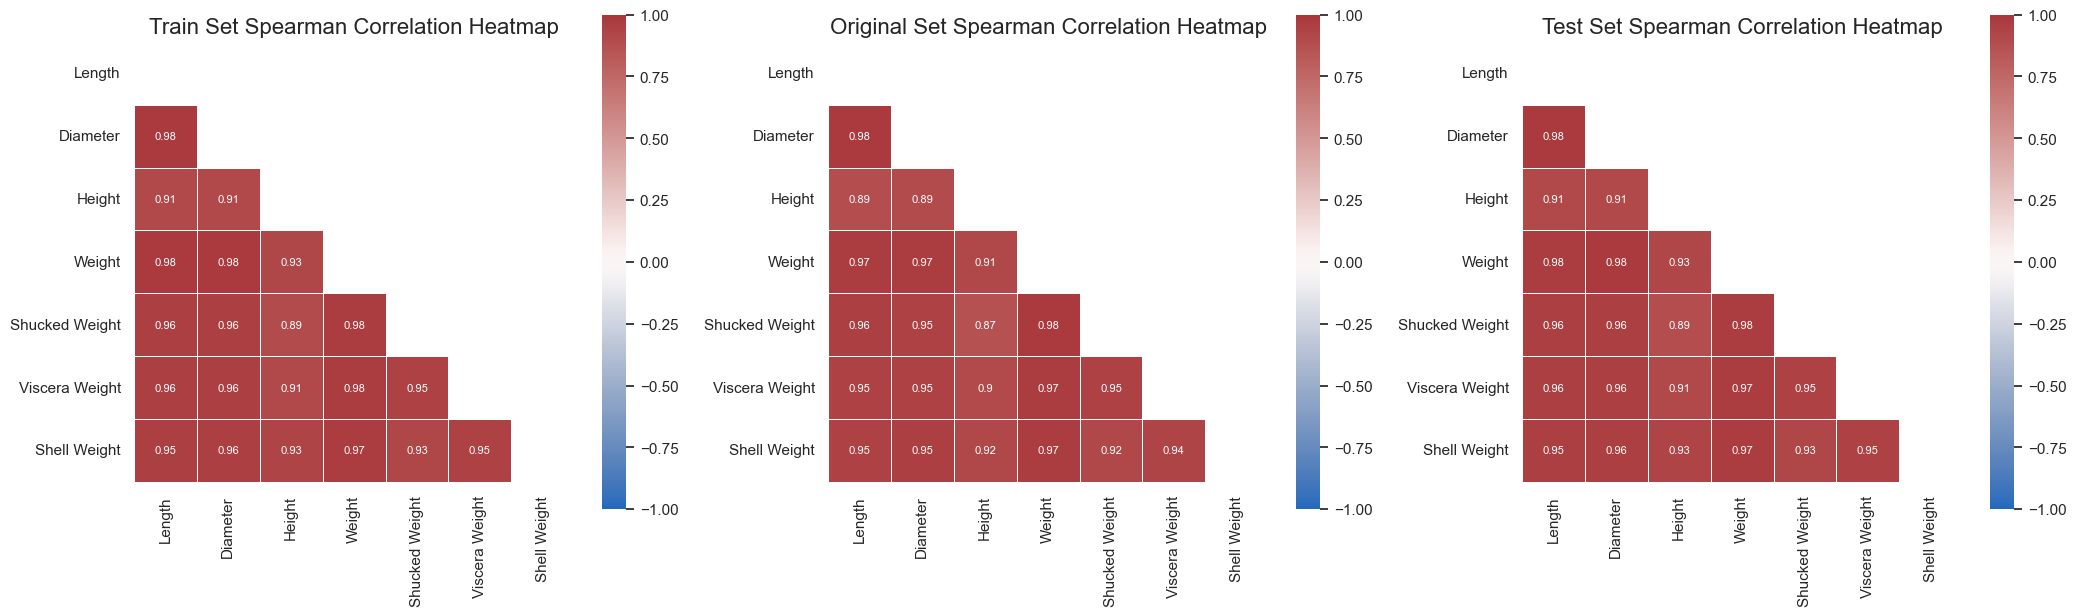

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax = ax.flatten()

# Define lost to iterate on
datasets = [(correlation_train, correlation_mask_train, 'Train Set Spearman Correlation Heatmap'),
            (correlation_orig, correlation_mask_orig, 'Original Set Spearman Correlation Heatmap'),
            (correlation_test, correlation_mask_test, 'Test Set Spearman Correlation Heatmap')]

for i, (correlation_data, correlation_mask, title) in enumerate(datasets):
    sns.heatmap(correlation_data,
                mask=correlation_mask,
                cmap='vlag',
                vmax=1.0,
                vmin=-1.0,
                center=0,
                square=True,
                linewidths=.5,
                annot=True,
                annot_kws={'fontsize': 8},
                cbar_kws={"shrink": .8, 'orientation': 'vertical'},
                ax=ax[i])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

## Pairplots

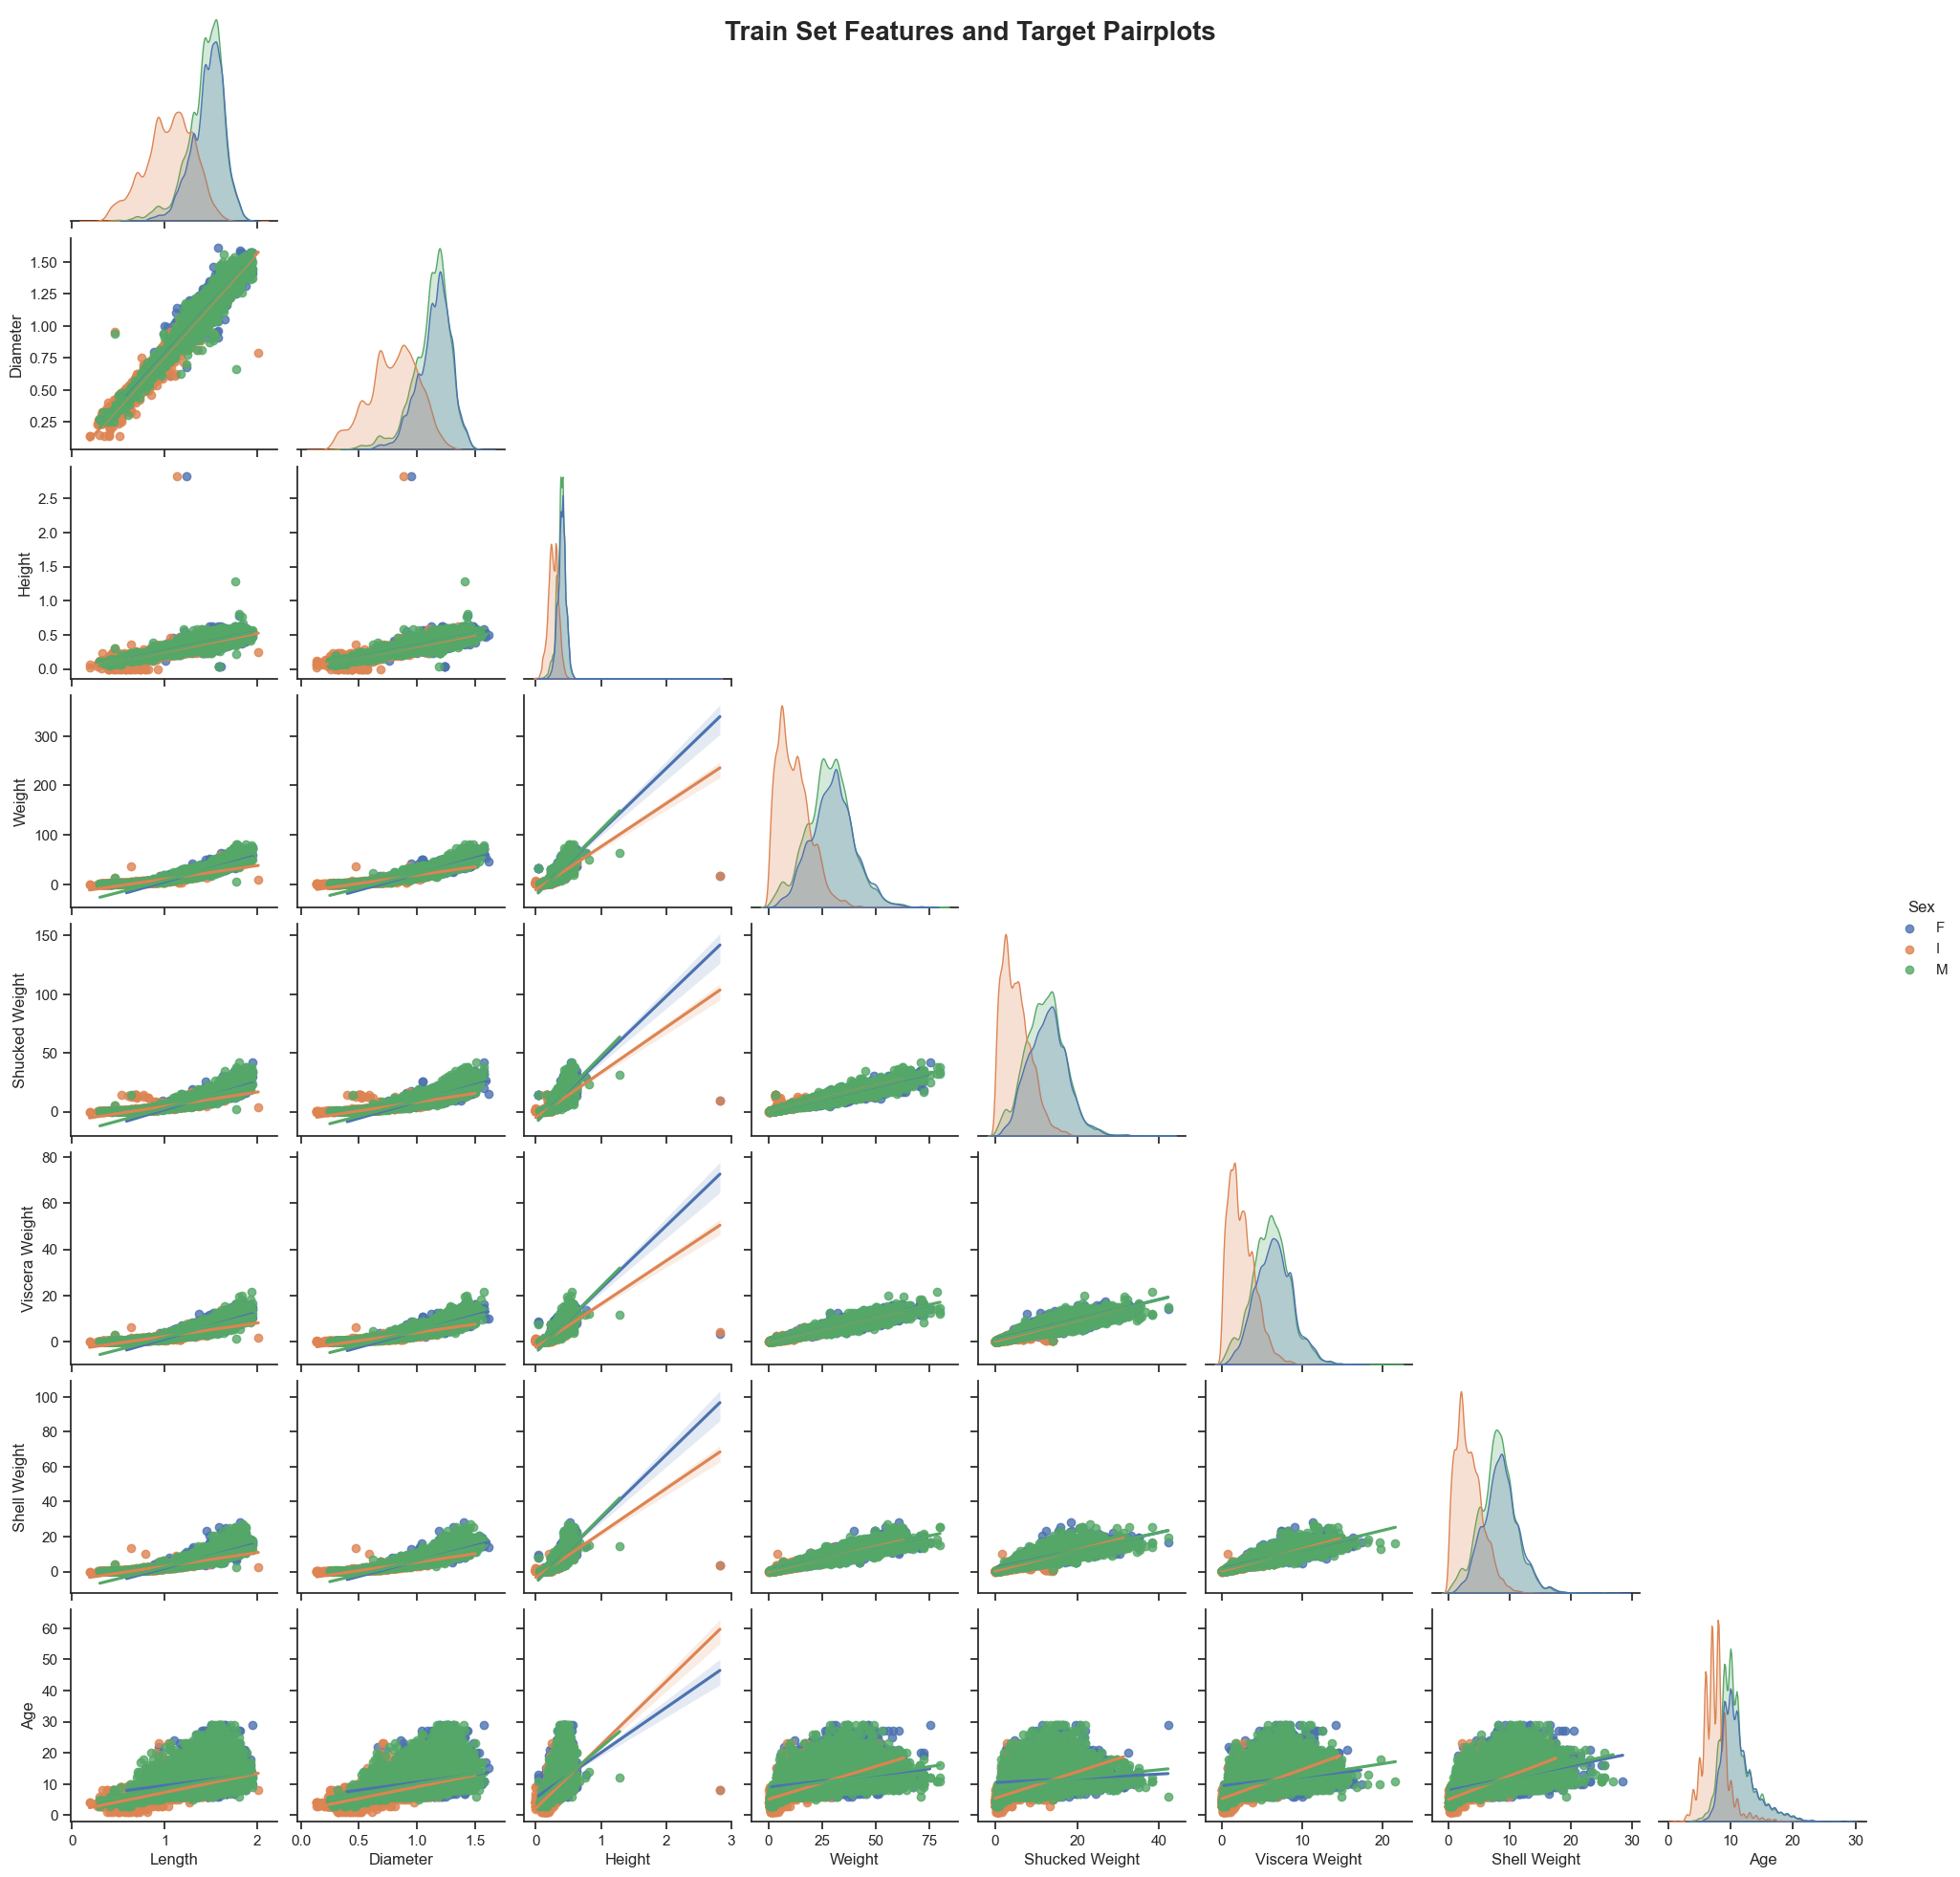

In [15]:
sns.pairplot(train_data,
             hue='Sex',
             kind="reg",
             diag_kind='kde',
             corner=True)

plt.suptitle('Train Set Features and Target Pairplots', 
             fontsize=20, 
             fontweight='bold')

plt.show()

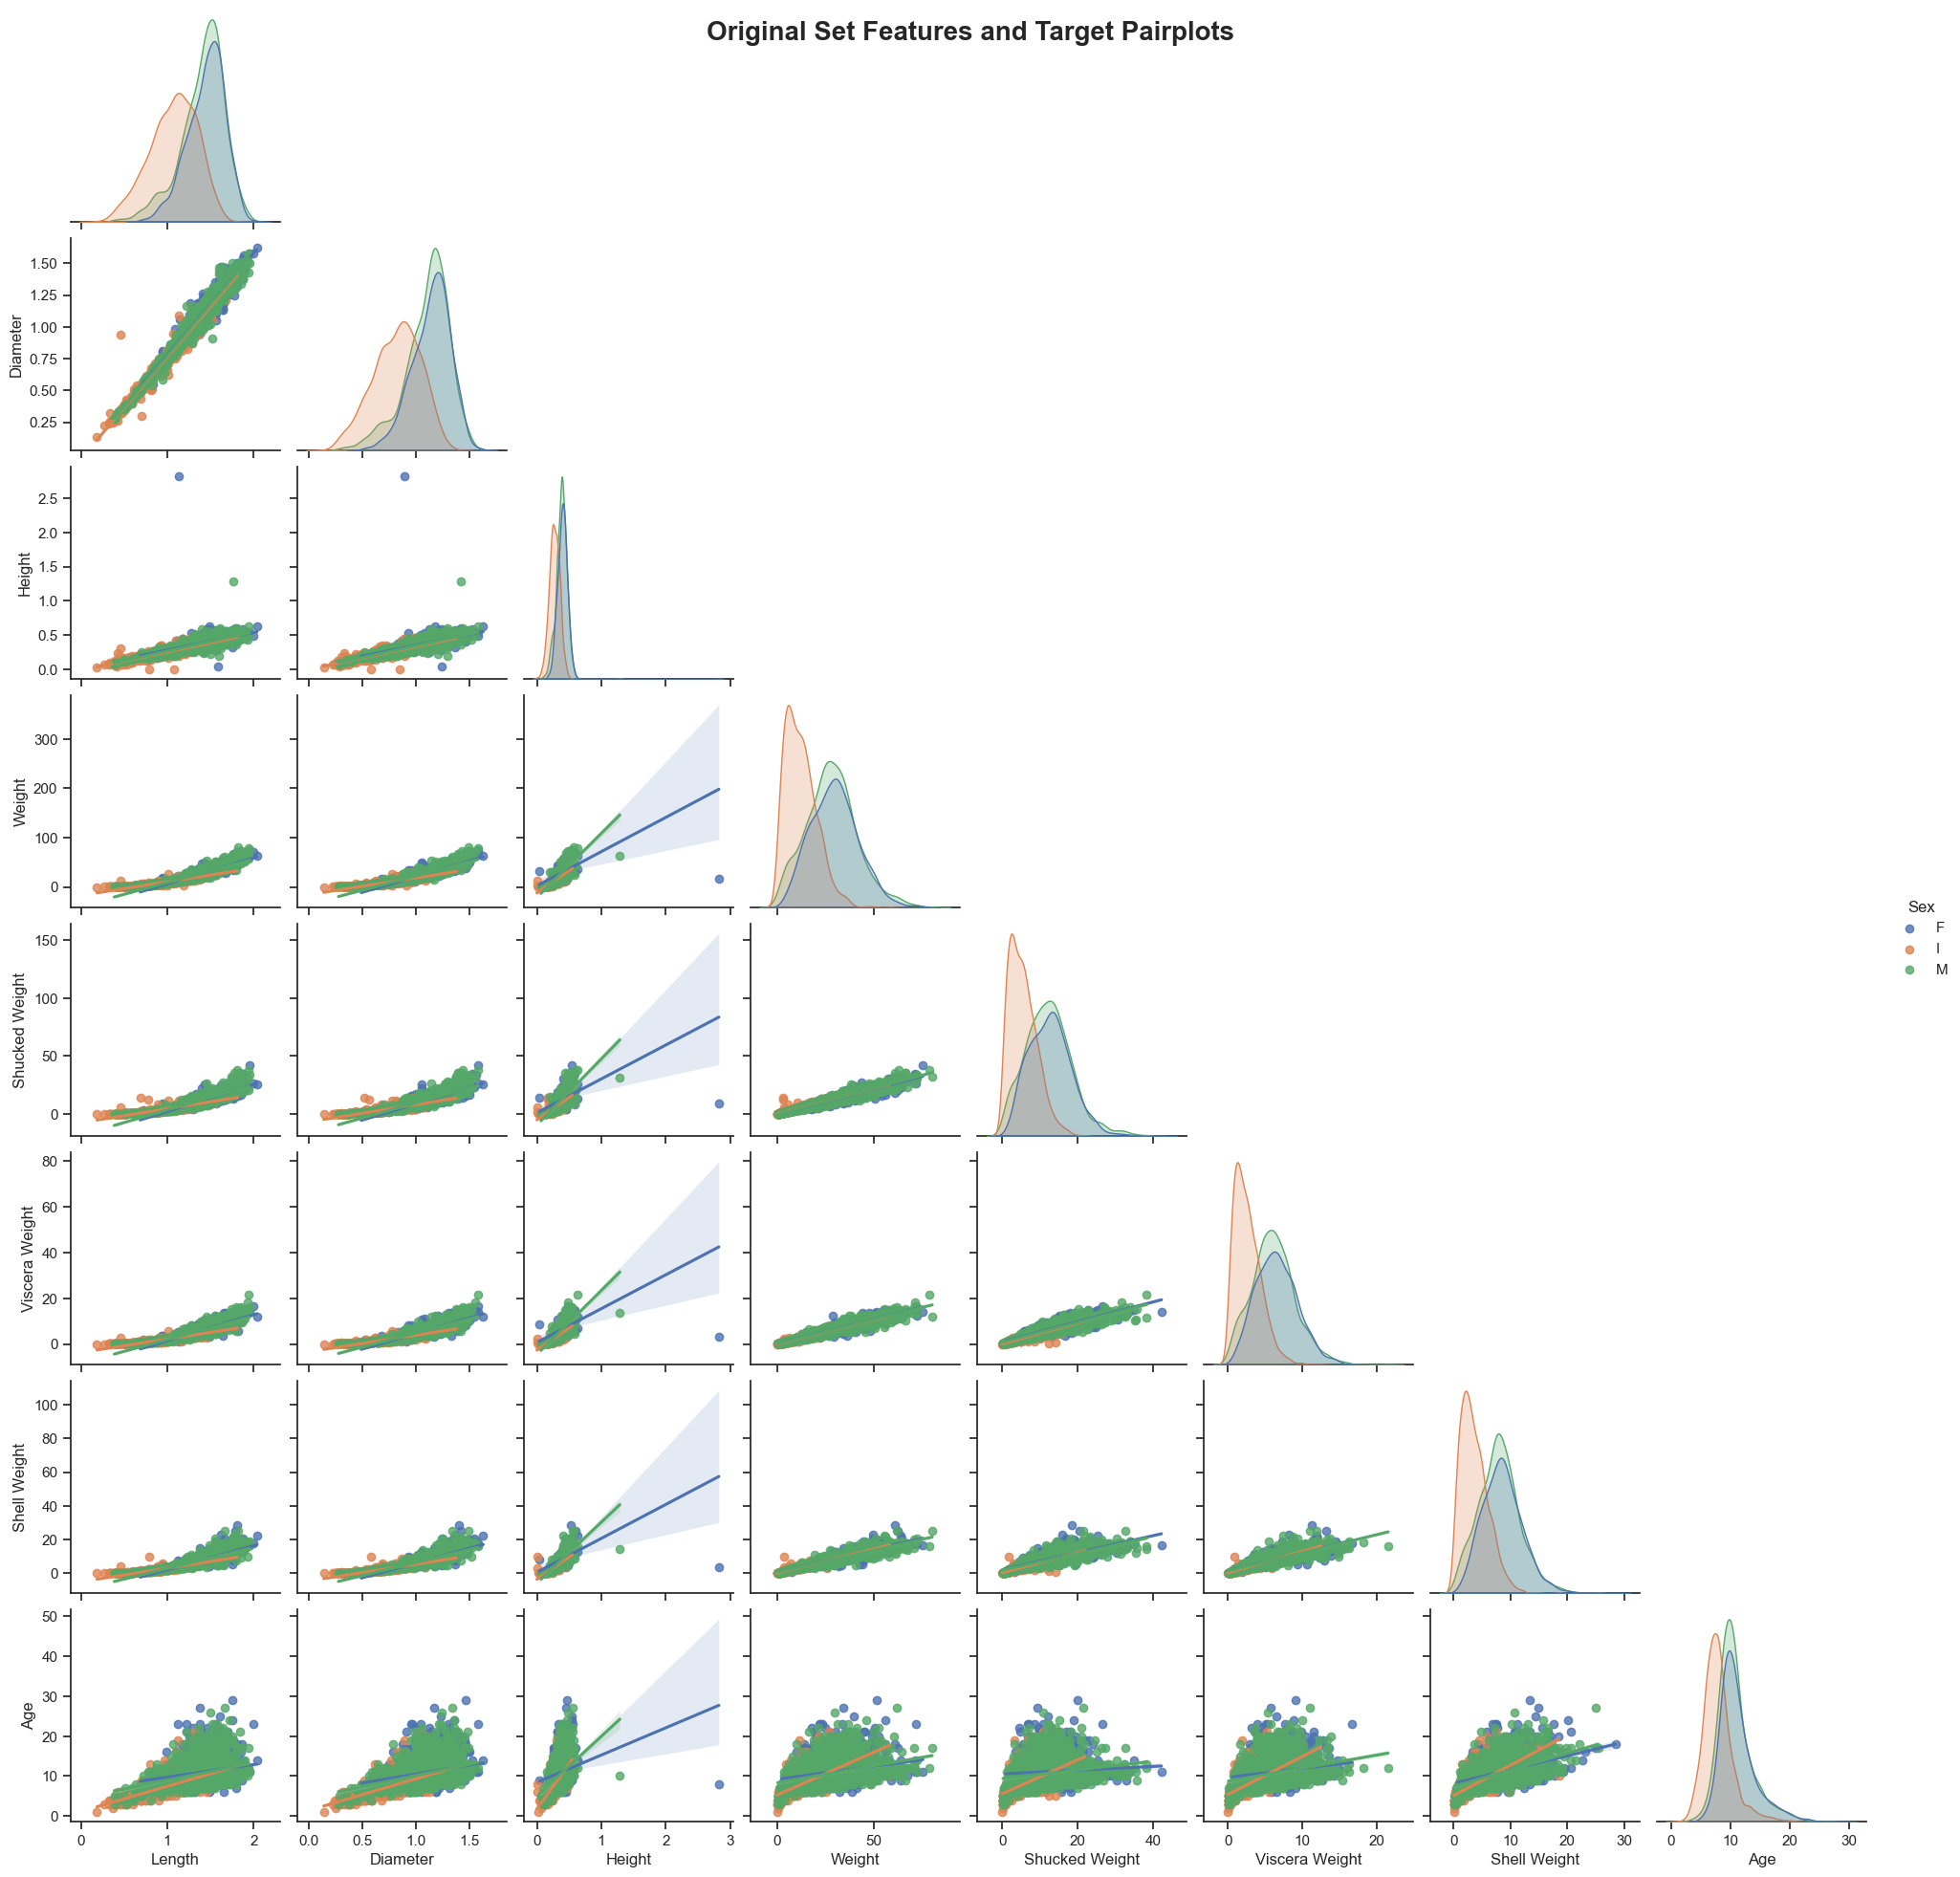

In [14]:
sns.pairplot(orig_data,
             hue='Sex',
             kind="reg",
             diag_kind='kde',
             corner=True)

plt.suptitle('Original Set Features and Target Pairplots', 
             fontsize=20, 
             fontweight='bold')

plt.show()

## ANOVA test on original dataset - f_oneway

The aim is to investigate the effect of 'Sex' on both featues and label


## Conclusions

- From both Pearson and Spearman correlation it looks like all the features are highly correlated between themselves, meaning that the crabs has a quasi-linear fisical growth while aging
- Apparently, when is it possible to determine the sex the crabs are older

### Whats nexts

- Feature engineering:
  - Create a Adult (F+M) vs Underage (I) column (Age_2)

<a name="3"></a>
# Preprocessing Data Before Modeling

## Feature Engineering

In [6]:
def compute_engineered_features(data: pd.DataFrame) -> pd.DataFrame:
    
    """
    Create engineered features to have the dataset model-ready
    
    Args:
        data Pandas.DataFrame input
    
    Returns:
        data Pandas.DataFrame with engineered features
    """
    
    # Create engineered features
    # Create a new columns to distinguish 'young' (U) vs "adult" (A) crabs
    data['Age_2']  = data['Sex'].map({'M': 'A', 'F': 'A', 'I': 'U'})
    
    data['Weight per Diameter'] = data['Weight'] * data['Diameter']
    
    data['Length per Diameter per Height'] = data['Length'] * data['Diameter'] * data['Height']
    
    data['Shucked per Viscera per Shell Weight'] = data['Shucked Weight'] * data['Viscera Weight'] * data['Shell Weight']
         
    return data

In [7]:
# Engineering features in train data
train_data = compute_engineered_features(train_data.copy())

# Engineering features in original data
orig_data = compute_engineered_features(orig_data.copy())

# Engineering features in test data
test_data = compute_engineered_features(test_data.copy())

## Concatenate train_data and orig_data

In [8]:
full_train_data = pd.concat([train_data, orig_data], axis=0)

## Defining Features and Label

In [9]:
numerical_features = ['Length',
                      'Diameter',
                      'Height',
                      'Weight',
                      'Shucked Weight',
                      'Viscera Weight',
                      'Shell Weight',
                      'Weight per Diameter',
                      'Length per Diameter per Height',
                      'Shucked per Viscera per Shell Weight']

categorical_features = ['Sex', 
                        'Age_2']

label = ['Age']

## Scale and Normalize Numerical Features

In [11]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', PowerTransformer())
])

# Fit and transform the train data using the pipeline
transformed_train_data = pd.DataFrame(pipeline.fit_transform(full_train_data[numerical_features]))

# Scaling removed column names - put them back
transformed_train_data.columns = numerical_features

# Reset index
transformed_train_data.index = full_train_data.index

# Transform test data
transformed_test_data = pd.DataFrame(pipeline.transform(test_data[numerical_features]))

# Scaling removed column names - put them back
transformed_test_data.columns = numerical_features

# Reset index
transformed_test_data.index = test_data.index

## Encoding Categorical Features + Concat Transformed Data

In [13]:
# Apply one-hot encoding on the 'Sex' column in the train set
encoded_sex = pd.get_dummies(full_train_data['Sex'], prefix='Sex')

# Ordinal Encoding Age_2 (U > I)
full_train_data['Encoded_Age_2'] = full_train_data['Age_2'].map({'A' : 1, 'U' : 2})

# Concat encoded_geometry to full_train_data_scaled
transformed_train_data = pd.concat([transformed_train_data, encoded_sex, full_train_data['Encoded_Age_2']], axis=1)

# Apply one-hot encoding on the 'Sex' column in the test set
encoded_sex = pd.get_dummies(test_data['Sex'], prefix='Sex')

# Ordinal Encoding Age_2 (U > I)
test_data['Encoded_Age_2'] = test_data['Age_2'].map({'A' : 1, 'U' : 2})

# Concat encoded_geometry to transformed_test_data
transformed_test_data = pd.concat([transformed_test_data, encoded_sex, test_data['Encoded_Age_2']], axis=1)

## Splitting Data Between Train and Test Set

In [14]:
# Defining a seed
seed = 108

In [15]:
# Define X and y for the training set
X = transformed_train_data
y = np.ravel(full_train_data[label])

# Splitting train dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

<a name="4"></a>
# Model Training

In [24]:
# Define metric(s) to compare the models
metrics = ['MAE']

# Initialize DataFrame of model performance
performance = pd.DataFrame(columns=metrics)

## Linear Regressor

Baseline model

In [182]:
%%time

# Instantiate a LinearRegression model
model_lr = LinearRegression()

# Fit logreg to the train set
model_lr.fit(X_train, y_train)

# predict y_pred values
y_pred_lr = model_lr.predict(X_test)

# Compute MAE metric
mae_lr = round(mean_absolute_error(y_test, y_pred_lr) ** 0.5, 4)

print('MAE: {}'.format(mae_lr))

MAE: 1.2196
CPU times: total: 78.1 ms
Wall time: 70 ms


In [194]:
# Update 'performance' DataFrame
performance.loc['Linear Regression'] = [mae_lr]

## Random Forest Regressor

In [183]:
# Defining Random Forest Regressor Hyperparameters
hyperparams_rf = {
    'n_estimators': 100,
    'criterion': 'squared_error',
    'max_depth': 9,
    'min_samples_split': 10,
    'min_samples_leaf': 10,
    'random_state' : seed
}

In [184]:
%%time

# Instantiate rf
model_rf = RandomForestRegressor(**hyperparams_rf)
            
# Fit rf to the training set    
model_rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred_rf = model_rf.predict(X_test)

# Compute RMSE metric
mae_rf = round(mean_absolute_error(y_test, y_pred_rf) ** 0.5, 4)

print('MAE: {}'.format(mae_rf))

MAE: 1.1921
CPU times: total: 24.9 s
Wall time: 24.9 s


In [185]:
# Update 'performance' DataFrame
performance.loc['Random Forest Regressor'] = [mae_rf]

## XGBoost Regressor

In [186]:
# define XGBoost hyperparams dict
hyperparams_xgb = {
    'n_estimators' : 500,
    'max_depth' : 5,
    'learning_rate' : 0.01
}

In [187]:
# Define the model
model_xgb = XGBRegressor(**hyperparams_xgb)

# Train the xgb to the training set
model_xgb.fit(X_train, y_train)

# Get predictions
y_pred_xgb = model_xgb.predict(X_test)

# Compute RMSE metric
mae_xgb = round(mean_absolute_error(y_test, y_pred_xgb) ** 0.5, 4)

print('MAE: {}'.format(mae_xgb))

MAE: 1.1883


In [188]:
# Update 'performance' DataFrame
performance.loc['XGBoost Regressor'] = [mae_xgb]

<a name="5"></a>
# Model Comparison

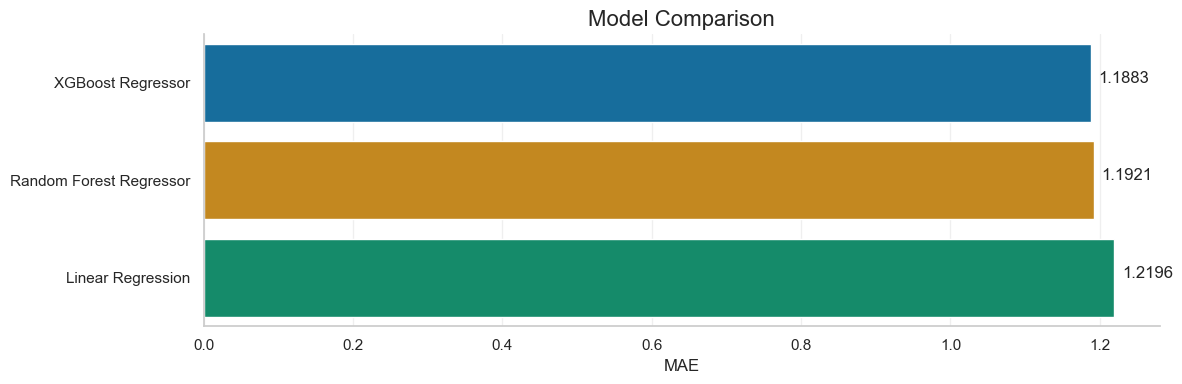

In [195]:
# Sort dataframe by the metric
performance.sort_values('MAE', inplace=True)

# Plot model metrics
ax = sns.barplot(data=performance, 
                 x='MAE', 
                 y=performance.index.tolist())

# Add data labels to the bars
for i, v in enumerate(performance['MAE']):
    ax.text(v + 0.01, i, str(round(v, 4)))

ax.set_title('Model Comparison')

plt.tight_layout()
plt.show()

<a name="6"></a>
# Model Tuning

In [21]:
# Defininf a flag to not rerun the gridsearch
hyperparams_tuning_flag = False

## XGBoost

In [208]:
%%time

if hyperparams_tuning_flag:   

    # Define a dictionary containing the parameters to tune
    params_model_xgb = {
        'n_estimators': [55, 250, 350],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 6, 7],
    }

    # Instantiate grid_gb
    grid_model_xgb = GridSearchCV(estimator=XGBRegressor(random_state=seed),
                           param_grid=params_model_xgb,
                           scoring='neg_mean_absolute_error',
                           cv=3,
                           verbose=1,
                           n_jobs=1)

    # Fit grid_model_rf
    grid_model_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
CPU times: total: 1h 12min 50s
Wall time: 11min 4s


In [209]:
if hyperparams_tuning_flag:     
    
    # Extract best hyperparams
    best_params_xgb = grid_model_xgb.best_params_

    print('Best hyperparameters for XGBoost model:\n', best_params_xgb)

Best hyperparameters for XGBoost model:
 {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 350}


In [210]:
if hyperparams_tuning_flag:    
    
    # Extract the best model performance
    best_model_xgb = grid_model_xgb.best_estimator_

    # Predict test set labels using the best model
    y_pred_best_xgb = best_model_xgb.predict(X_test)

    # Compute RMSE metric
    mae_best_xgb = round(mean_absolute_error(y_test, y_pred_best_xgb) ** 0.5, 4)

    print('MAE: {}'.format(mae_best_xgb))

MAE: 1.178


### Best XGBoost

In [17]:
# define XGBoost hyperparams dict
hyperparams_best_xgb = {
    'n_estimators' : 350,
    'max_depth' : 7,
    'learning_rate' : 0.01
}

In [22]:
# Define the model
model_best_xgb = XGBRegressor(**hyperparams_best_xgb)

# Train the xgb to the training set
model_best_xgb.fit(X_train, y_train)

# Get predictions
y_pred_best_xgb = model_best_xgb.predict(X_test)

# Compute RMSE metric
mae_best_xgb = round(mean_absolute_error(y_test, y_pred_best_xgb) ** 0.5, 4)

print('MAE: {}'.format(mae_best_xgb))

MAE: 1.1768


In [25]:
# Update 'performance' DataFrame
performance.loc['XGBoost Regressor'] = [mae_best_xgb]

<a name="7"></a>
# Model Diagnostic

Diagnostic the fit of the best performing models

## Feature Importance

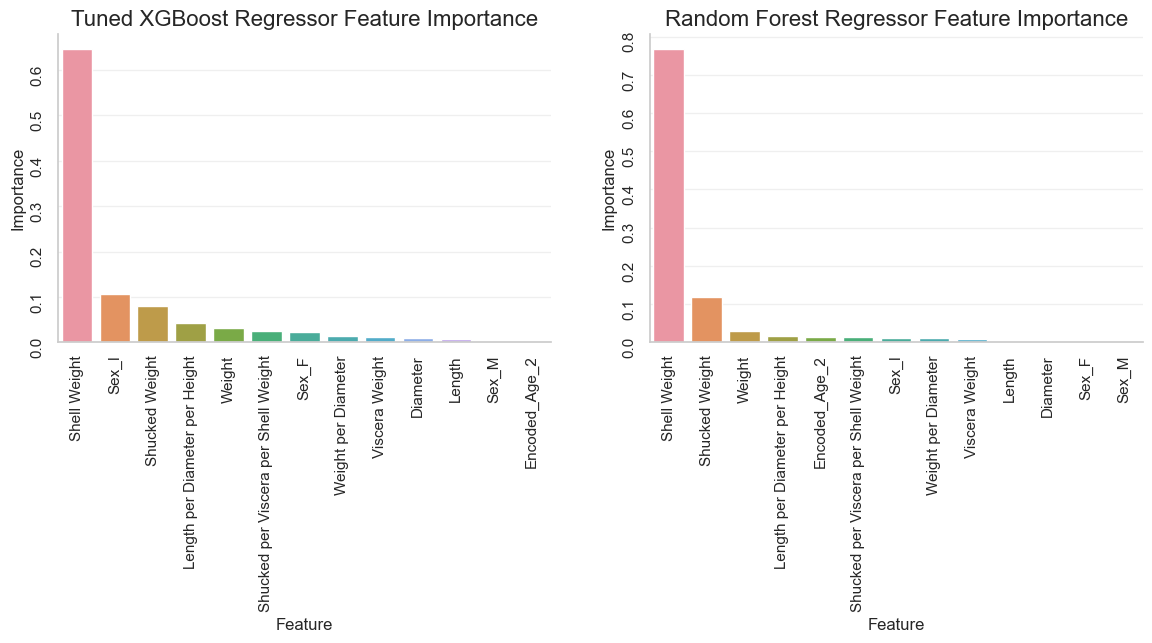

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Compute the feature importance
importances_xgb = sorted(list(zip(model_xgb.feature_names_in_,
                              model_xgb.feature_importances_)))

# Transform it into a DataFrame
importances_xgb_df = pd.DataFrame(importances_xgb,
                                     columns= ['Feature', 'Importance'])

# Sorting importances
importances_xgb_df = importances_xgb_df.sort_values(['Importance'], ascending=False).reset_index(drop=True)

# Plot the feature importance
ax[0] = sns.barplot(data=importances_xgb_df, 
                 x='Feature', 
                 y='Importance',
                 ax=ax[0])
ax[0].set_title('Tuned XGBoost Regressor Feature Importance')
ax[0].tick_params(labelrotation=90)

# Compute the feature importance
importances_rf = sorted(list(zip(model_rf.feature_names_in_,
                              model_rf.feature_importances_)))

# Transform it into a DataFrame
importances_rf_df = pd.DataFrame(importances_rf,
                                     columns= ['Feature', 'Importance'])

# Sorting importances
importances_rf_df = importances_rf_df.sort_values(['Importance'], ascending=False).reset_index(drop=True)

# Plot the feature importance
ax[1] = sns.barplot(data=importances_rf_df, 
                 x='Feature', 
                 y='Importance',
                 ax=ax[1])
ax[1].set_title('Random Forest Regressor Feature Importance')
ax[1].tick_params(labelrotation=90)

plt.show()

## Q-Q Plot

NameError: name 'y_pred_rf' is not defined

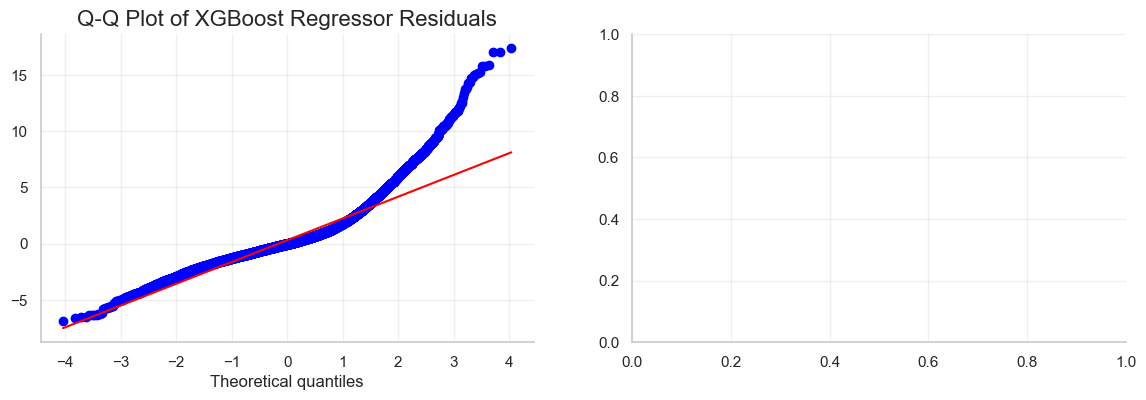

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Calculate the residuals for best_model_xgb
residuals_best_xgb = y_test - y_pred_best_xgb

# Generate a QQ plot for best_model_xgb
stats.probplot(residuals_best_xgb, 
               plot=ax[0])
ax[0].set_title('Q-Q Plot of XGBoost Regressor Residuals', fontsize=16)
ax[0].set_xlabel('Theoretical quantiles')
ax[0].set_ylabel('')

# Calculate the residuals for best_model_gb
residuals_rf = y_test - y_pred_rf

# Generate a QQ plot for model 1
stats.probplot(residuals_rf, 
               plot=ax[1])
ax[1].set_title('Q-Q Plot of Random Forest Regressor Residuals', fontsize=16)
ax[1].set_xlabel('Theoretical quantiles')
ax[1].set_ylabel('Sample quantiles')

plt.show()

## Residuals

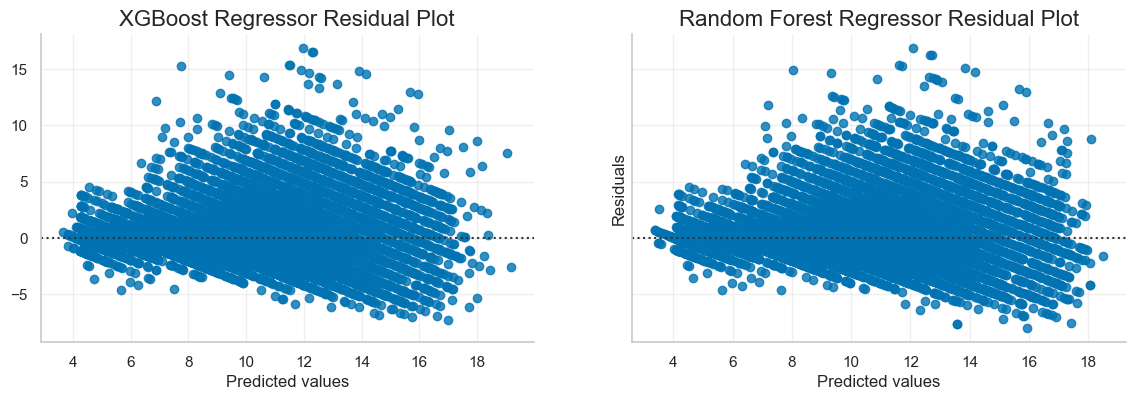

In [192]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,4))

# Create a DataFrame of residuals for best_model_xgb
residuals_xgb = y_test - y_pred_xgb
df_resid_xgb = pd.DataFrame({'residuals': residuals_xgb, 'y_pred_xgb': y_pred_xgb})

# Plot the residuals for best_model_xgb
sns.residplot(x='y_pred_xgb',
              y='residuals', 
              data=df_resid_xgb, 
              ax=ax[0])
ax[0].set_title('XGBoost Regressor Residual Plot', fontsize=16)
ax[0].set_xlabel('Predicted values')
ax[0].set_ylabel('')

# Create a DataFrame of residuals for best_model_gb
residuals_rf = y_test - y_pred_rf
df_resid_rf = pd.DataFrame({'residuals': residuals_rf, 'y_pred_rf': y_pred_rf})

# Plot the residuals for best_model_gb
sns.residplot(x='y_pred_rf', 
              y='residuals', 
              data=df_resid_rf, 
              ax=ax[1])
ax[1].set_title('Random Forest Regressor Residual Plot', fontsize=16)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

plt.show()

## Predicted vs Actual Values

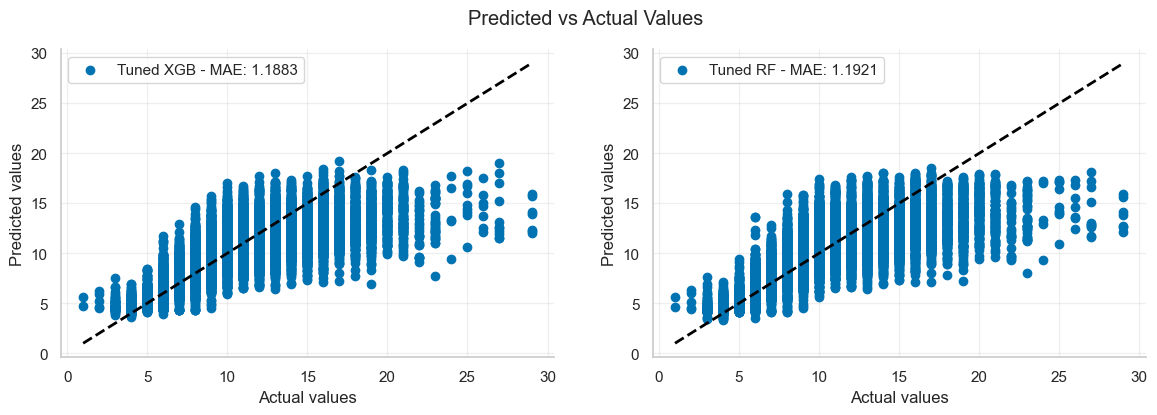

In [193]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot the predicted vs actual values for each model
ax[0].scatter(y_test, 
            y_pred_xgb, 
            label='Tuned XGB - MAE: {}'.format(mae_xgb))
ax[0].plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'k--', 
         lw=2)

ax[1].scatter(y_test, 
            y_pred_rf, 
            label='Tuned RF - MAE: {}'.format(mae_rf))
ax[1].plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'k--', 
         lw=2)

# Add a legend to the plot
ax[0].legend()
ax[1].legend()

# Set x and y axis labels for the plot
ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')

fig.suptitle('Predicted vs Actual Values')

plt.show()

## Predicted vs Actual Values per Feature

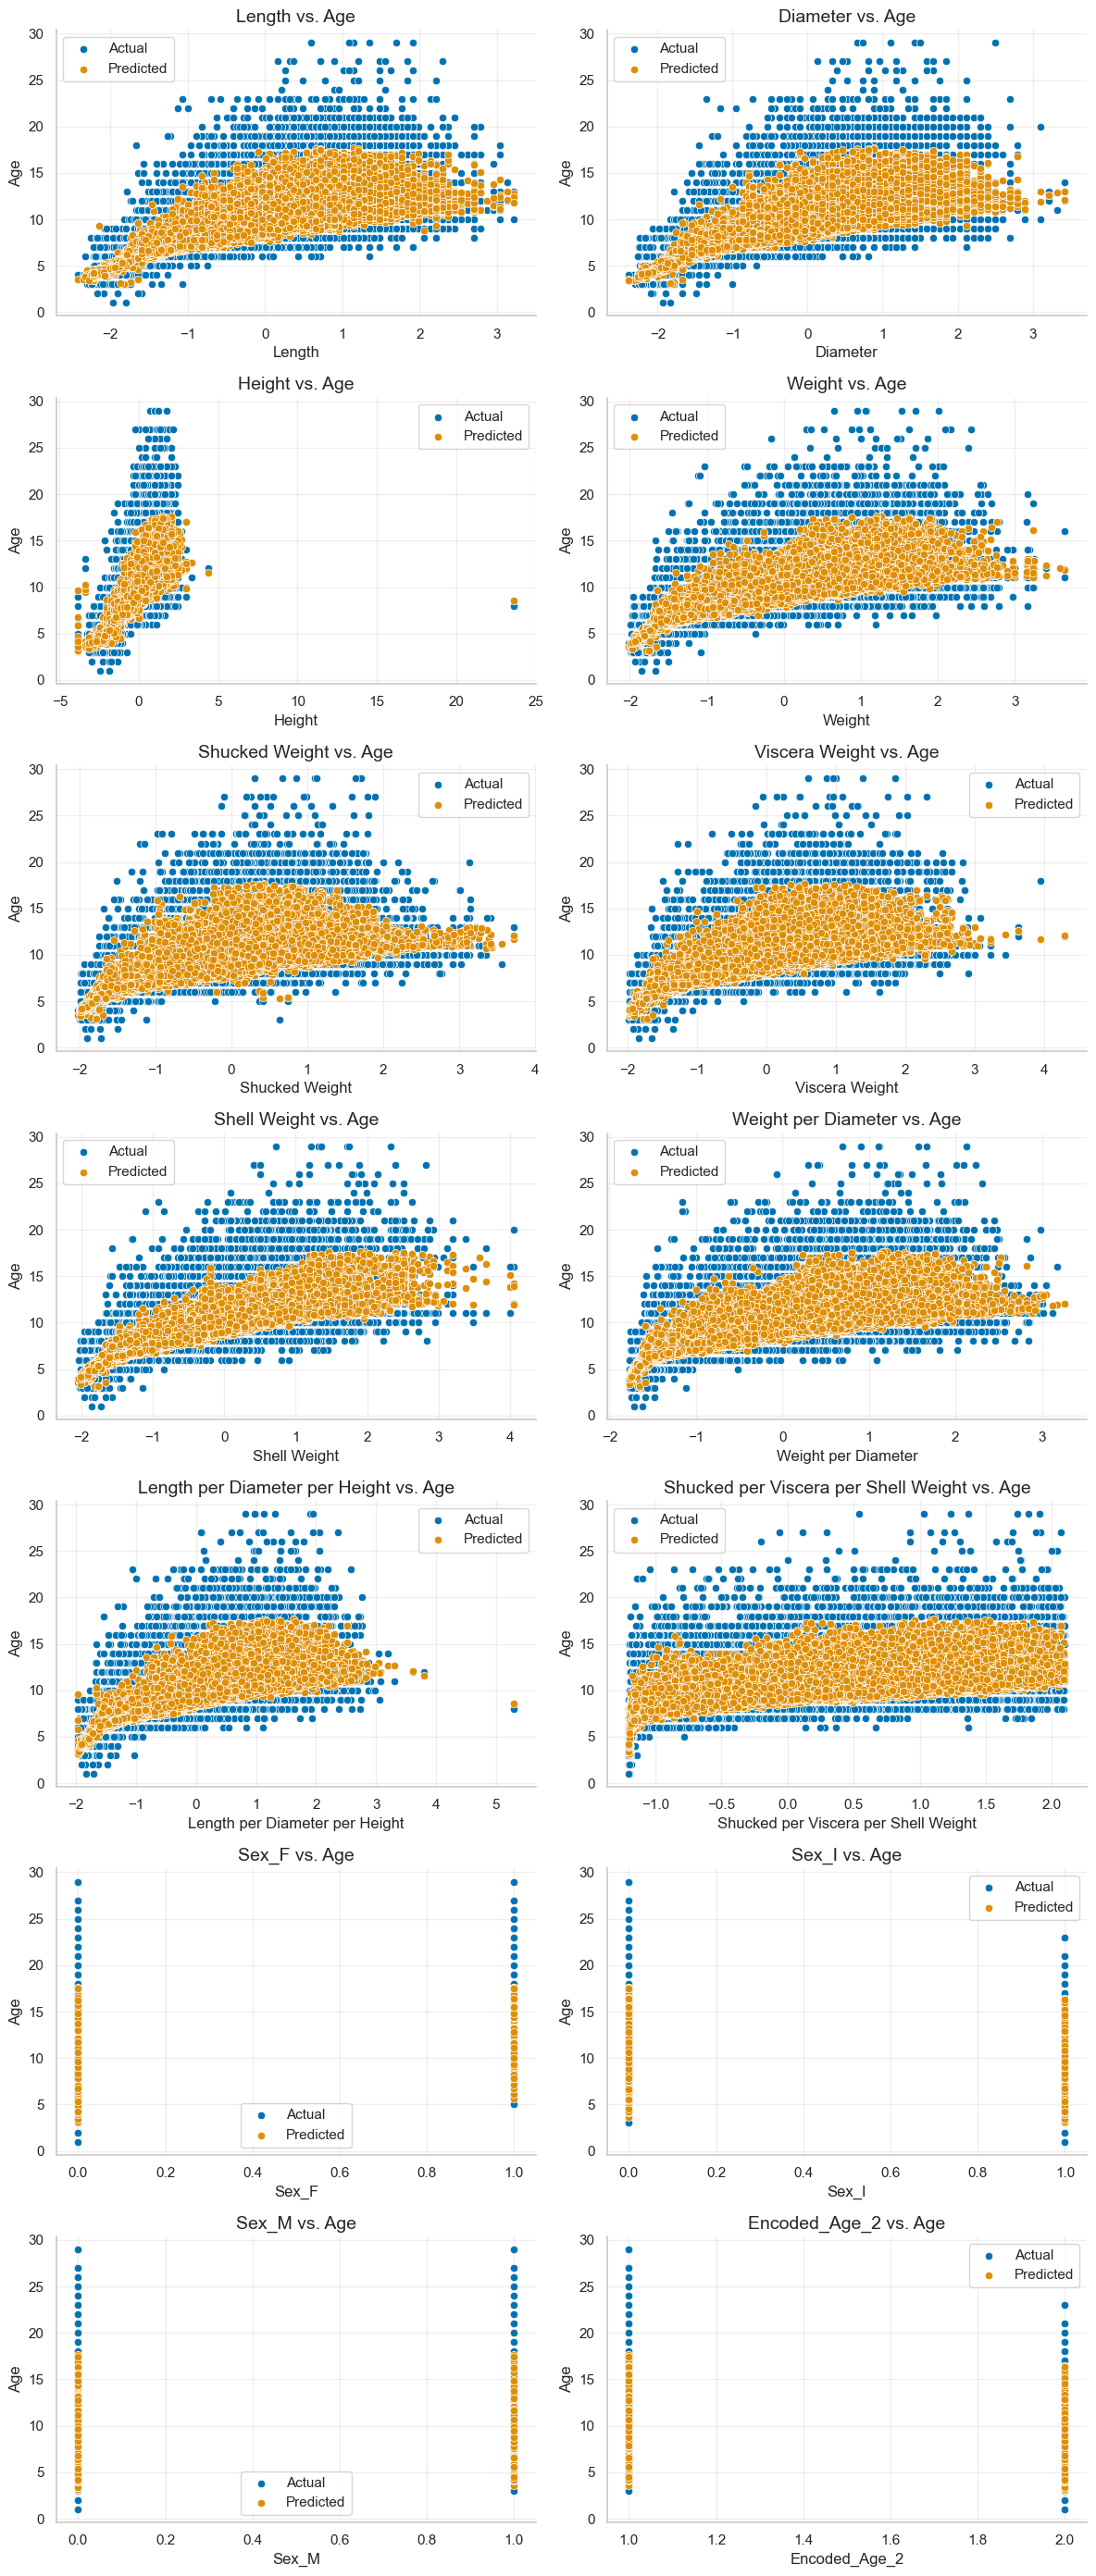

In [70]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12, 28))

# Flatten the axis array
ax = ax.flatten()

# Iterate over each feature and create scatterplot
for feature_idx, feature_name in enumerate(X_test.columns):
    
    # Create scatterplot on the current axis
    sns.scatterplot(x=X_test[feature_name], 
                    y=y_test, 
                    label='Actual', 
                    ax=ax[feature_idx])
    sns.scatterplot(x=X_test[feature_name], 
                    y=y_pred_best_xgb, 
                    label='Predicted', 
                    ax=ax[feature_idx])
    
    ax[feature_idx].set_xlabel(feature_name)
    ax[feature_idx].set_ylabel('Age')
    ax[feature_idx].set_title('{} vs. Age'.format(feature_name), fontsize=14)
    ax[feature_idx].legend()

plt.tight_layout()
plt.show()

<a name="8"></a>
# Challenge Submission

In [27]:
# Generate predictions with test set with the besst performing model (based on RMSE)
submission_predictions = model_best_xgb.predict(transformed_test_data)

In [28]:
# Create submission DataFrame
submission = pd.DataFrame({'id': test_data.index, 'Age': submission_predictions})

In [29]:
submission.head()

,id,Age
0,74051,7.453388
1,74052,7.597459
2,74053,10.708120
3,74054,9.352441
4,74055,7.351294


In [30]:
# Write CSV File
submission.to_csv('./submission.csv', index=False)